idée sujet :

rechercher les partenaires privilégiés : par exemple regarder sur des acteurs précis combien de value ils échangent avec certains partenaires avec lequels ils ont plus d'échanges ( au cours du temps) => essayer de regarder si des préférent certains partenaires

on peut chercher ceux du plus gros acteurs déterminés dans profit analysis

In [2]:
import glob
from datetime import datetime
import pandas as pd
from os import path

fileNames = glob.glob('networks/*')
print(fileNames)
file_dict = {
    datetime.strptime(path.basename(file).split('.')[0], '%Y-%m-%d'): pd.read_csv(file)
    for file in fileNames
}

compA = pd.concat(file_dict).sort_index()
compA

['networks\\2015-1-1.csv', 'networks\\2015-1-10.csv', 'networks\\2015-1-11.csv', 'networks\\2015-1-12.csv', 'networks\\2015-1-13.csv', 'networks\\2015-1-14.csv', 'networks\\2015-1-15.csv', 'networks\\2015-1-16.csv', 'networks\\2015-1-17.csv', 'networks\\2015-1-18.csv', 'networks\\2015-1-19.csv', 'networks\\2015-1-2.csv', 'networks\\2015-1-20.csv', 'networks\\2015-1-21.csv', 'networks\\2015-1-22.csv', 'networks\\2015-1-23.csv', 'networks\\2015-1-24.csv', 'networks\\2015-1-25.csv', 'networks\\2015-1-26.csv', 'networks\\2015-1-27.csv', 'networks\\2015-1-28.csv', 'networks\\2015-1-29.csv', 'networks\\2015-1-3.csv', 'networks\\2015-1-30.csv', 'networks\\2015-1-31.csv', 'networks\\2015-1-4.csv', 'networks\\2015-1-5.csv', 'networks\\2015-1-6.csv', 'networks\\2015-1-7.csv', 'networks\\2015-1-8.csv', 'networks\\2015-1-9.csv', 'networks\\2015-10-1.csv', 'networks\\2015-10-10.csv', 'networks\\2015-10-11.csv', 'networks\\2015-10-12.csv', 'networks\\2015-10-13.csv', 'networks\\2015-10-14.csv', 'net

Source        Target        value  \
2015-01-01 0     ePay.info_CoinJoinMess  CloudBet.com      3519173   
           1                     Cex.io          1956      8491196   
           2                     157228     C-Cex.com  10833480021   
           3                          0           421     27123449   
           4               BTCGuild.com        787953   2507884460   
...                                 ...           ...          ...   
2017-06-30 5463                71554939           227    381902496   
           5464                72288955            44      1280939   
           5465                 4833806           386   1192762366   
           5466                 1228047           189   1080246068   
           5467                      94     BTC-e.com    194944382   

                 nb_transactions  
2015-01-01 0                   1  
           1                   3  
           2                   1  
           3                   8  
           4                   1  
...                          ...  
2017-06-30 5463                1  
           5464                1  
           5465                1  
           5466                2  
           5467                3  

[5876734 rows x 4 columns]

In [3]:
# keep only 2015/01/01
compA2015 = compA.loc['2015-01-01']

# make a df of the actors and an edge list of their target

adjacency_list = compA2015.groupby('Source').agg({'Target': lambda x: list(x), 'value': lambda x: list(x)})

# make the index a column
adjacency_list.reset_index(inplace=True)

# set the index to a list of numbers
adjacency_list.index = range(len(adjacency_list))


adjacency_list

,Source,Target,value
0,0,"[421, 1323, 1956, NitrogenSports.eu, ePay.info...","[27123449, 4347764, 400114, 1214270, 70585962,..."
1,100157,[27723],[8378114]
2,10073457,"[72209845, 74330500, CoinTrader.net_LocalBitco...","[87120857, 90926607, 76740857]"
3,10166,[72446410],[361010000]
4,10251,[CoinTrader.net_LocalBitcoins.com],[11316835]
...,...,...,...
517,VirWoX.com,[342],[31210824576]
518,Vircurex.com,"[0, 2024]","[7999012, 9960000]"
519,YABTCL.com,[0],[675207289]
520,Zyado.com,"[Kraken.com, Bitcoin.de]","[173904000, 206500000]"


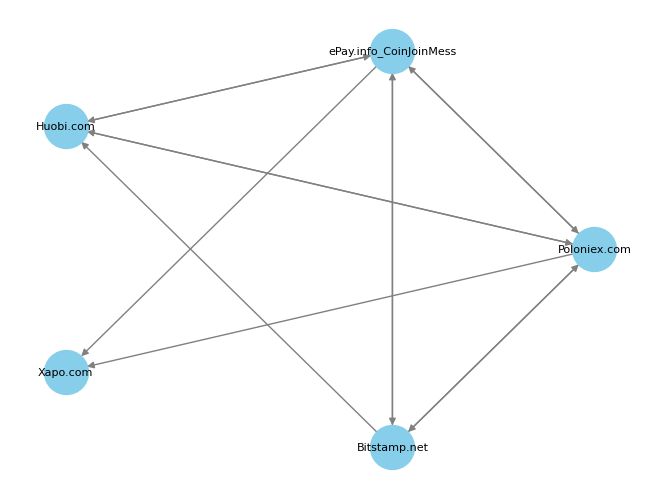

In [12]:
# make a graph of all the target of the source Poloniex.com

import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

# add nodes
# only ['Poloniex.com', 'ePay.info_CoinJoinMess', 'Huobi.com', 'Xapo.com', 'Bitstamp.net']
top5 = ['Poloniex.com', 'ePay.info_CoinJoinMess', 'Huobi.com', 'Xapo.com', 'Bitstamp.net']
G.add_nodes_from(['Poloniex.com', 'ePay.info_CoinJoinMess', 'Huobi.com', 'Xapo.com', 'Bitstamp.net'])

# add edges
for i in range(len(adjacency_list)):
    if adjacency_list.loc[i, 'Source'] in top5:
            for j in range(len(adjacency_list.loc[i, 'Target'])):
                if adjacency_list.loc[i, 'Target'][j] in top5:
                    G.add_edge(adjacency_list.loc[i, 'Source'], adjacency_list.loc[i, 'Target'][j], weight=adjacency_list.loc[i, 'value'][j])

# draw the graph
nx.draw_circular(G, with_labels=True,node_size=1000, node_color='skyblue', edge_color='grey', font_size=8)
plt.show()